In [22]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation

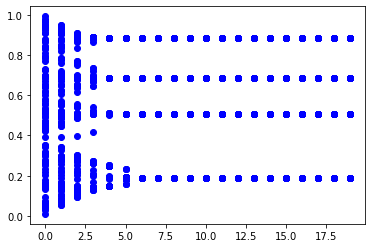

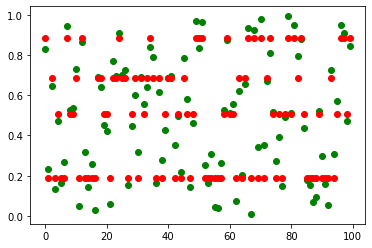

In [3]:
network_size = 100
iterations = 20
tolerance = 0.1

opinions = np.random.rand((network_size))
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]


for iter in range(iterations):
    for i in range(len(opinions)):
        like_minded = []
        for person in opinions:
            if abs(person - opinions[i]) < tolerance:
                like_minded.append(person)
        newopinions[i] = np.mean(like_minded)
        
    plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    allopinions.append(opinions)

plt.show()


plt.plot(initial,'go')
plt.plot(opinions, 'ro')
plt.show()


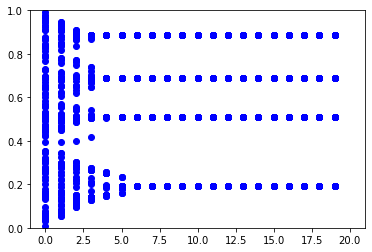

In [4]:
x1 = []
for iter in range(iterations):
    x1.append(iter * np.ones(network_size))
    
# set up animation plots
fig, ax = plt.subplots()

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(x1[i], allopinions[i])
    old = ax.scatter(x1[i], allopinions[i], color = 'b')
    return [l, old]
    
ax.axis([-1,21,0,1])
l, = ax.plot([],[],'b.')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

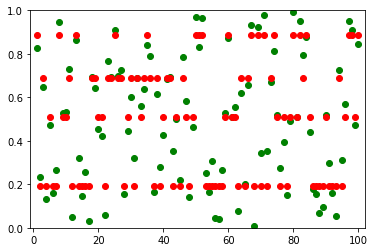

In [5]:
x2 = np.linspace(1, network_size, 100)

# set up animation plots
fig, ax = plt.subplots()
ax.plot(x2, initial, 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(x2, allopinions[i])
    return [l]
    
ax.axis([-1,102,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

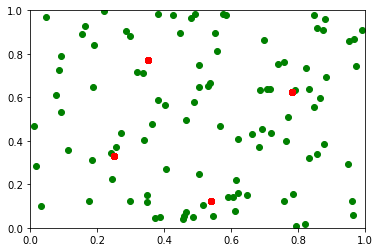

In [61]:
# Two opinions

network_size = 100
iterations = 20
tolerance = 0.2

opinions = np.random.rand(network_size, 2)
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]


for iter in range(iterations):
    for i in range(network_size):
        like_minded_1 =[]
        like_minded_2 = []
        for j in range(network_size):
            if np.linalg.norm(opinions[i,:]-opinions[j,:],2) < tolerance:
                like_minded_1.append(opinions[j,0])
                like_minded_2.append(opinions[j,1])

        newopinions[i,0] = np.mean(like_minded_1)
        newopinions[i,1] = np.mean(like_minded_2)

    #plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    #plt.scatter(opinions[:,0], opinions[:,1])

    allopinions.append(opinions)



# set up animation plots
fig, ax = plt.subplots()
ax.plot(initial[:,0], initial[:,1], 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(allopinions[i][:,0], allopinions[i][:,1])
    return [l]
    
ax.axis([0,1,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

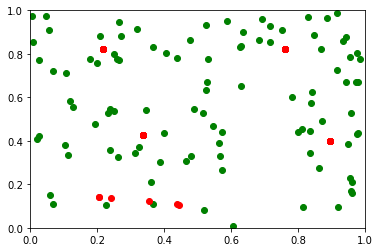

In [7]:
# What if people are less influenced by people in their network? i.e. their own opinion has a higher weight than others' at each step?
# unsurprisingly it converges slower

# Two opinions

network_size = 100
iterations = 20
tolerance = 0.2
own_weight = 10

opinions = np.random.rand(network_size, 2)
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]


for iter in range(iterations):
    for i in range(network_size):
        like_minded_1 =[]
        like_minded_2 = []
        for j in range(network_size):
            if np.linalg.norm(opinions[i,:]-opinions[j,:],2) < tolerance:
                like_minded_1.append(opinions[j,0])
                like_minded_2.append(opinions[j,1])
        like_minded_1.append(opinions[i,0])
        like_minded_2.append(opinions[i,1])
        weights1 = np.ones(len(like_minded_1))
        weights2 = np.ones(len(like_minded_2))
        weights1[-1] = own_weight-1
        weights2[-1] = own_weight-1
        newopinions[i,0] = np.average(like_minded_1, weights=weights1)
        newopinions[i,1] = np.average(like_minded_2, weights=weights2)

    #plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    #plt.scatter(opinions[:,0], opinions[:,1])

    allopinions.append(opinions)



# set up animation plots
fig, ax = plt.subplots()
ax.plot(initial[:,0], initial[:,1], 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(allopinions[i][:,0], allopinions[i][:,1])
    return [l]
    
ax.axis([0,1,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

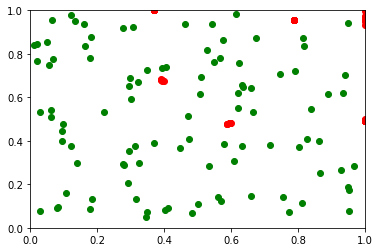

In [8]:
# What if we add an opinion drift?

# Two opinions

network_size = 100
iterations = 50
tolerance = 0.2
own_weight = 100
op1drift = 0.005
op2drift = 0.005

opinions = np.random.rand(network_size, 2)
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]


for iter in range(iterations):
    for i in range(network_size):
        like_minded_1 =[]
        like_minded_2 = []
        for j in range(network_size):
            if np.linalg.norm(opinions[i,:]-opinions[j,:],2) < tolerance:
                like_minded_1.append(opinions[j,0])
                like_minded_2.append(opinions[j,1])

        like_minded_1.append(opinions[i,0])
        like_minded_2.append(opinions[i,1])
        weights1 = np.ones(len(like_minded_1))
        weights2 = np.ones(len(like_minded_2))
        weights1[-1] = own_weight-1
        weights2[-1] = own_weight-1
        newopinions[i,0] = np.average(like_minded_1, weights=weights1) + op1drift
        newopinions[i,1] = np.average(like_minded_2, weights=weights2) + op2drift
        if newopinions[i,0] >1:
            newopinions[i,0] = 1
        if newopinions[i,1] >1:
            newopinions[i,1] = 1
    #plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    #plt.scatter(opinions[:,0], opinions[:,1])

    allopinions.append(opinions)



# set up animation plots
fig, ax = plt.subplots()
ax.plot(initial[:,0], initial[:,1], 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(allopinions[i][:,0], allopinions[i][:,1])
    return [l]
    
ax.axis([0,1,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())

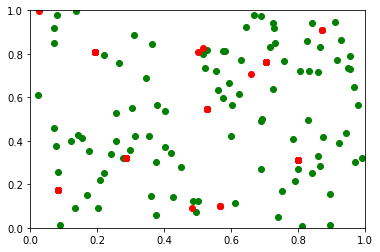

In [72]:
# to model people leaving and new people entering the network
# new influence (without any weighting or drifts)
# reset/randomise some of the opinions every once in a while. while maintaining the network size
# result? hmm

# Two opinions

network_size = 100
iterations = 30
tolerance = 0.2
change_rate = 0.03

opinions = np.random.rand(network_size, 2)
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]

for iter in range(iterations):
    # pick random people to replace
    randomlist = random.sample(range(1, network_size), int(change_rate*network_size))
    for n in randomlist:
        # adjust the opinions for new people
        opinions[n,0] = random.random()   
        opinions[n,1] = random.random()
    
    for i in range(network_size):
        like_minded_1 =[]
        like_minded_2 = []
        for j in range(network_size):
            if np.linalg.norm(opinions[i,:]-opinions[j,:],2) < tolerance:
                like_minded_1.append(opinions[j,0])
                like_minded_2.append(opinions[j,1])

        newopinions[i,0] = np.mean(like_minded_1)
        newopinions[i,1] = np.mean(like_minded_2)


    #plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    #plt.scatter(opinions[:,0], opinions[:,1])

    allopinions.append(opinions)



# set up animation plots
fig, ax = plt.subplots()
ax.plot(initial[:,0], initial[:,1], 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(allopinions[i][:,0], allopinions[i][:,1])
    return [l]
    
ax.axis([0,1,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())


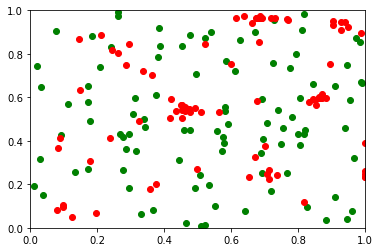

In [74]:
# to model people leaving and new people entering the network
# new influence (with weightings or drifts)
# interesting results.

# Two opinions

network_size = 100
iterations = 30
tolerance = 0.2
change_rate = 0.03
own_weight = 100
op1drift = 0.005
op2drift = 0.005

opinions = np.random.rand(network_size, 2)
initial = np.copy(opinions)
newopinions = np.copy(opinions)
allopinions = [np.copy(opinions)]

for iter in range(iterations):
    # pick random people to replace
    randomlist = random.sample(range(1, network_size), int(change_rate*network_size))
    for n in randomlist:
        # adjust the opinions for new people
        opinions[n,0] = random.random()   
        opinions[n,1] = random.random()
    
    for i in range(network_size):
        like_minded_1 =[]
        like_minded_2 = []
        for j in range(network_size):
            if np.linalg.norm(opinions[i,:]-opinions[j,:],2) < tolerance:
                like_minded_1.append(opinions[j,0])
                like_minded_2.append(opinions[j,1])

        like_minded_1.append(opinions[i,0])
        like_minded_2.append(opinions[i,1])
        weights1 = np.ones(len(like_minded_1))
        weights2 = np.ones(len(like_minded_2))
        weights1[-1] = own_weight-1
        weights2[-1] = own_weight-1
        newopinions[i,0] = np.average(like_minded_1, weights=weights1) + op1drift
        newopinions[i,1] = np.average(like_minded_2, weights=weights2) + op2drift
        if newopinions[i,0] >1:
            newopinions[i,0] = 1
        if newopinions[i,1] >1:
            newopinions[i,1] = 1
    #plt.plot( iter * np.ones(network_size), opinions, 'bo')
    opinions = np.copy(newopinions)
    #plt.scatter(opinions[:,0], opinions[:,1])

    allopinions.append(opinions)


# set up animation plots
fig, ax = plt.subplots()
ax.plot(initial[:,0], initial[:,1], 'go')

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(allopinions[i][:,0], allopinions[i][:,1])
    return [l]
    
ax.axis([0,1,0,1])
l, = ax.plot([],[],'ro')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, blit = True, frames=iterations)

from IPython.display import HTML
HTML(ani2.to_jshtml())